# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import json
import os
%matplotlib notebook
# import openweathermapy as ow

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
#Check to make sure api key imported correctly
api_key

'249d3e07e9e334e2d4bef699eca650f7'

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    city = city.replace(" ","+")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

657

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# base_url = "http://api.openweathermap.org/data/2.5/weather?"
# query_url = f"{base_url}appid={api_key}&units={units}&q={c}"
# response = requests.get(query_url).json()

City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lon = []
Max_Temp = []
Wind_Speed = []
# cities_100 = cities[:11]
# Starting the record count as 1
record_count = 1
units = "metric"
print('''Retrtrieving data
''')
base_url = "http://api.openweathermap.org/data/2.5/weather?"
for c in cities:
    try:
        base_url = "http://api.openweathermap.org/data/2.5/weather?"
        # Starting with the url and getting it to append to each city
        query_url = f"{base_url}appid={api_key}&units={units}&q={c}"
        response = requests.get(query_url).json()
        print(f"Checking the URL\n{query_url}")
        
        # Appending each list as declared above
        City.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lon.append(response['coord']['lat'])
        Max_Temp.append(response['main']['temp_max'])
        Wind_Speed.append(response['wind']['speed'])
        
        c_fixed = c.replace("+"," ")
        
        print(f"\nRecord {record_count} of Set 1 | {c_fixed}")
        print("--------------------------")
        
        # Adding up on the record
        record_count += 1
                
        time.sleep(1.5)
    except:
#         c_fixed = c.replace("+"," ")
        print(f"\nWas not found: {c}")
        print("--------------------------")
    continue



Retrtrieving data

Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=249d3e07e9e334e2d4bef699eca650f7&units=metric&q=dikson

Record 1 of Set 1 | dikson
--------------------------
Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=249d3e07e9e334e2d4bef699eca650f7&units=metric&q=hobart

Record 2 of Set 1 | hobart
--------------------------
Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=249d3e07e9e334e2d4bef699eca650f7&units=metric&q=castro

Record 3 of Set 1 | castro
--------------------------
Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=249d3e07e9e334e2d4bef699eca650f7&units=metric&q=avarua

Record 4 of Set 1 | avarua
--------------------------
Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=249d3e07e9e334e2d4bef699eca650f7&units=metric&q=sitka

Record 5 of Set 1 | sitka
--------------------------
Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=249d3e07e9e33

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
#Create DataFrame with Required Items
df = pd.DataFrame({
    "City":City,
    "Cloudiness":Cloudiness,
    "Country":Country,
    "Date":Date,
    "Humidity":Humidity,
    "Lat":Lat,
    "Lon":Lon,
    "Max_Temp":Max_Temp,
    "Wind_Speed":Wind_Speed})
df.count()


City          601
Cloudiness    601
Country       601
Date          601
Humidity      601
Lat           601
Lon           601
Max_Temp      601
Wind_Speed    601
dtype: int64

In [11]:
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max_Temp,Wind_Speed
0,Dikson,100,RU,1581574180,93,73.51,73.51,-6.98,10.59
1,Hobart,75,AU,1581574699,49,-42.88,-42.88,22.22,5.70
2,Castro,43,BR,1581574230,98,-24.79,-24.79,13.10,2.18
3,Avarua,100,CK,1581574735,94,-21.21,-21.21,24.00,1.00
4,Sitka,90,US,1581574737,100,57.05,57.05,1.00,2.10


In [12]:
#Save DataFrame as CSV
df.to_csv("Cities_&_weather_stats.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [19]:
# getting the current data
from datetime import datetime as dt
print(dt.today())

2020-02-12 22:41:06.408140


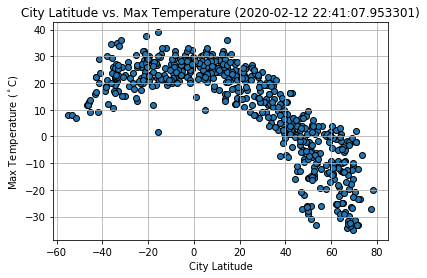

In [20]:
fig1, ax1 = plt.subplots()
latitude = df.Lat
temperature = df.Max_Temp
ax1.scatter(latitude, temperature, marker='o', edgecolors='black')
ax1.set_title(f"City Latitude vs. Max Temperature ({dt.today()})")
ax1.set_xlabel("City Latitude")
ax1.set_ylabel("Max Temperature ($^\circ$C)")
ax1.grid(axis='both')

#Save plot and display
fig1.savefig("Fig 1 - City Latitude vs. Max Temperature.png")

#### Latitude vs. Humidity Plot

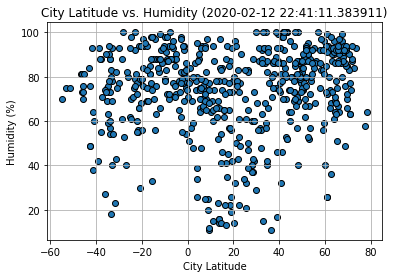

In [21]:
fig2, ax2 = plt.subplots()
latitude = df.Lat
humidity = df.Humidity
ax2.scatter(latitude, humidity, marker='o', edgecolors='black')
ax2.set_title(f"City Latitude vs. Humidity ({dt.today()})")
ax2.set_xlabel("City Latitude")
ax2.set_ylabel("Humidity (%)")
ax2.grid(axis='both')

#Save the plot and display it
fig2.savefig(f"Fig 2 - City Latitude vs. Humidity.png")

#### Latitude vs. Cloudiness Plot

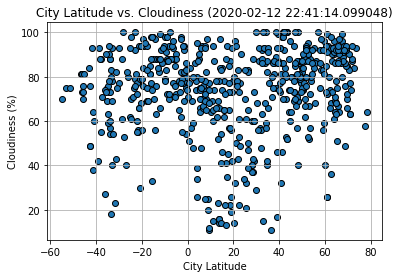

In [22]:
fig3, ax3 = plt.subplots()
latitude = df.Lat
cloudiness = df.Cloudiness
ax3.scatter(latitude, humidity, marker='o', edgecolors='black')
ax3.set_title(f"City Latitude vs. Cloudiness ({dt.today()})")
ax3.set_xlabel("City Latitude")
ax3.set_ylabel("Cloudiness (%)")
ax3.grid(axis='both')

#Save the plot and display it
fig3.savefig(f"Fig 3 - City Latitude vs. Cloudiness.png")

#### Latitude vs. Wind Speed Plot

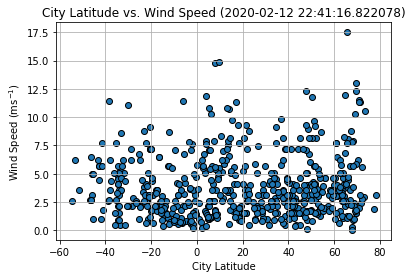

In [23]:
fig4, ax4 = plt.subplots()
latitude = df.Lat
wind_speed = df.Wind_Speed
ax4.scatter(latitude, wind_speed, marker='o', edgecolors='black')
ax4.set_title(f"City Latitude vs. Wind Speed ({dt.today()})")
ax4.set_xlabel("City Latitude")
ax4.set_ylabel("Wind Speed (ms$^{-1}$)")
ax4.grid(axis='both')

#Save the plot and display it
fig4.savefig(f"Fig 4 - City Latitude vs Wind Speed)")

In [24]:
#My Findings: 
#1. The closer a city is located to 0 in latitude, the higher the temperature will be. 
        #City Latitude vs. Temperature
    
#2. There is no relation between a city's geographic location and its percentage of cloudiness. 
        #City Latitude vs. Cloudiness
    
#3. A slight concentration in high humidity percentage and a higher number of latitude.
        #City Latitude vs. Humidity